<a href="https://colab.research.google.com/github/ammarameenn/Talking-Heads/blob/main/GANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import matplotlib.pyplot as plt
from torch import nn, optim
import cv2
from google.colab.patches import cv2_imshow
import os
import numpy as np
import pandas as pd
import dlib

In [ ]:
!pip install facenet-pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
DATA_DIR = '/content/drive/MyDrive/300VW_Dataset_2015_12_14/300VW_Dataset_2015_12_14/'

In [ ]:
Test_1 = ['114', '124', '125', '126', '150', '158', '401', '402', '505', '506', '507', '508', '509', '510', '511', '514', '515', '518', '519', '520', '521', '522', '524', '525', '537', '538', '540', '541', '546', '547', '548']
Test_2 = ['203', '208', '211', '212', '213', '214', '218', '224', '403', '404', '405', '406', '407', '408', '409', '412', '550', '551', '553']
Test_3 = ['410', '411', '516', '517', '526', '528', '529', '530', '531', '533', '557', '558', '559', '562']

In [ ]:
dir_list = os.listdir(DATA_DIR)
dir_list.remove('ReadMe.txt')
dir_list.remove('extra.zip')

In [ ]:
Train_list=[]
for i in dir_list:
  if i not in Test_1:
    if i not in Test_2:
      if i not in Test_3:
        Train_list.append(i)

In [ ]:
Train_list

['205',
 '223',
 '225',
 '160',
 '143',
 '144',
 '138',
 '204',
 '113',
 '123',
 '112',
 '057',
 '115',
 '120',
 '119',
 '059',
 '037',
 '043',
 '046',
 '048',
 '044',
 '049',
 '053',
 '039',
 '041',
 '047',
 '027',
 '034',
 '035',
 '031',
 '033',
 '025',
 '029',
 '022',
 '020',
 '028',
 '011',
 '007',
 '018',
 '019',
 '015',
 '016',
 '010',
 '013',
 '009',
 '017',
 '004',
 '001',
 '003',
 '002']

In [ ]:
folder_path = os.path.join(DATA_DIR, Train_list[0])
folder_list = os.listdir(folder_path)
video_path = os.path.join(folder_path, folder_list[0])
annot_path = os.path.join(folder_path, folder_list[1])

In [ ]:
frames_ld = os.listdir(annot_path)
frames_ld = np.sort(frames_ld)
ld_path = os.path.join(annot_path, frames_ld[10])

In [ ]:
def read_pts(filename):
    return np.loadtxt(filename, comments=("version:", "n_points:", "{", "}"))

In [ ]:
target_ld = read_pts(ld_path).astype(int)

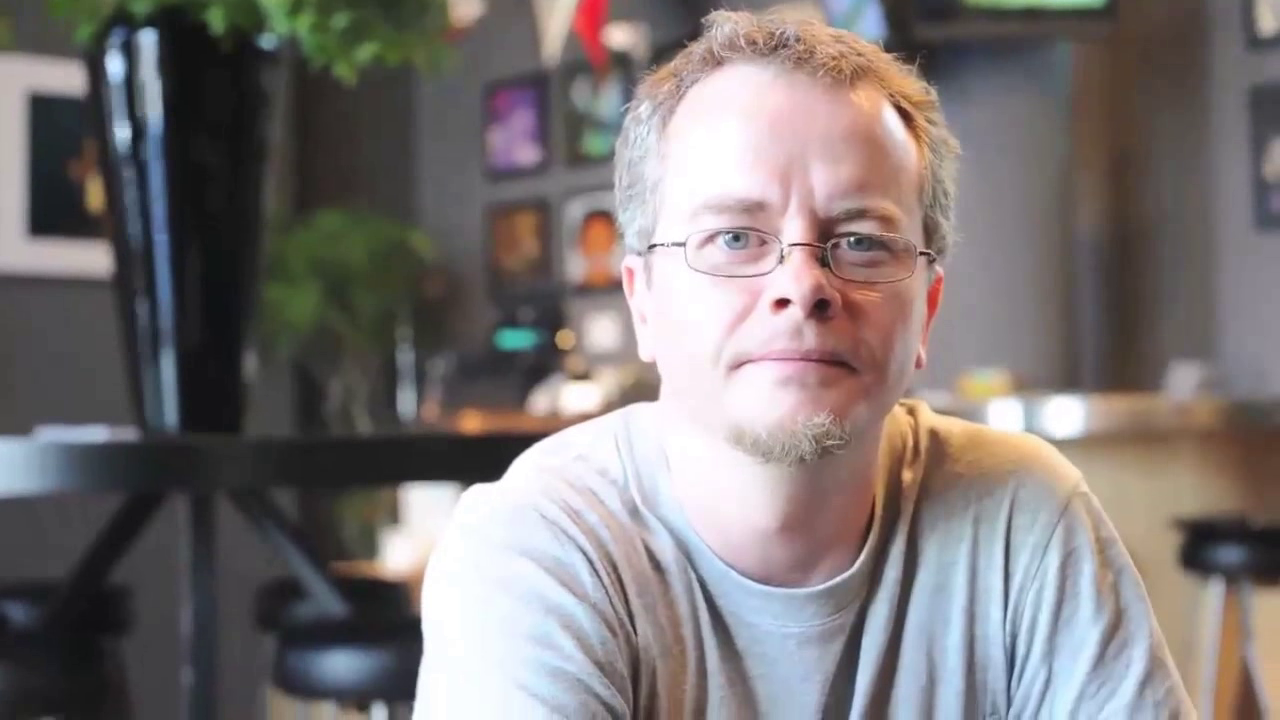

In [ ]:
cap = cv2.VideoCapture(video_path)
frame_number = 10
cap.set(cv2.CAP_PROP_POS_FRAMES,frame_number-1)

ret, frame = cap.read()
cv2_imshow(frame)

# while cap.isOpened():
#     ret, frame = cap.read()
#     cv2_imshow(frame)
    
#     if cv2.waitKey(25) & 0xFF==ord('q'):
#         break
        
# cap.release()
# cv2.destroyAllWindows()

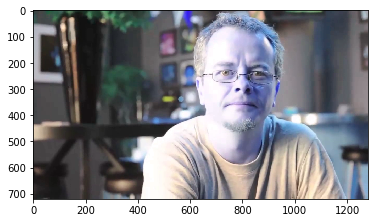

In [ ]:
plt.imshow(frame, interpolation='nearest')
plt.show()

In [ ]:
detector = dlib.get_frontal_face_detector()

In [ ]:
shape_predictor_path = '/content/drive/MyDrive/shape_predictor_68_face_landmarks.dat'

In [ ]:
predictor = dlib.shape_predictor(shape_predictor_path)

In [ ]:
frame.shape

(720, 1280, 3)

rectangles[[(633, 134) (954, 455)]]


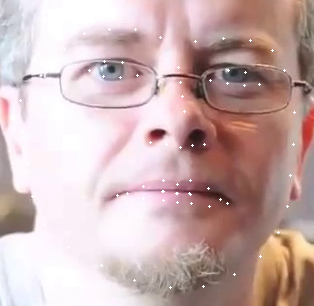

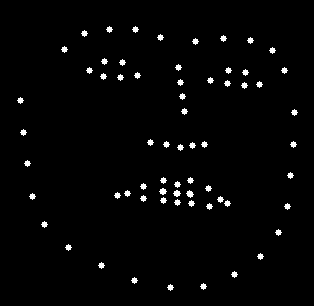

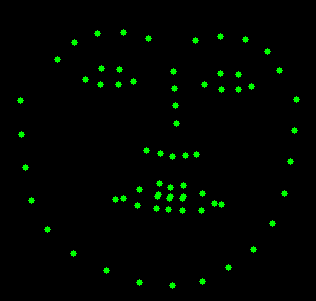

In [ ]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
# Detect the face
rects = detector(gray, 1)
print(rects)
  # Detect landmarks for each face
mask1 = np.zeros(frame.shape, dtype = "uint8")
mask2 = np.zeros(frame.shape, dtype = "uint8")

for rect in rects:
    # Get the landmark points
    shape = predictor(gray, rect)
    shape_np = np.zeros((68, 2), dtype="int")
    for i in range(0, 68):
        shape_np[i] = (shape.part(i).x, shape.part(i).y)
    shape = shape_np

      # Display the landmarks
    for i, (x, y) in enumerate(shape):
	      # Draw the circle to mark the keypoint 
        cv2.circle(frame, (x, y), 1, (255, 255, 255), -1)
        cv2.circle(mask1, (x, y), 3, (255, 255, 255), -1)
      
    for i, (x, y) in enumerate(target_ld):
	      # Draw the circle to mark the keypoint 
        cv2.circle(mask2, (x, y), 3, (0,255,0),-1)
		
# Display the image
cv2_imshow(frame[shape[0][1]-100:shape[9][1]+20, shape[0][0]-20:shape[16][0]+20])
cv2_imshow(mask1[shape[0][1]-100:shape[9][1]+20, shape[0][0]-20:shape[16][0]+20])
cv2_imshow(mask2[target_ld[0][1]-100:target_ld[9][1]+20, target_ld[0][0]-20:target_ld[16][0]+20])

cap.release()

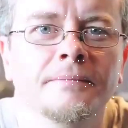

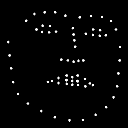

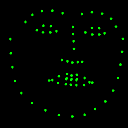

In [ ]:
resize_frame = cv2.resize(frame[shape[0][1]-100:shape[9][1]+20, shape[0][0]-20:shape[16][0]+20], (128, 128))
resize_mask1 = cv2.resize(mask1[shape[0][1]-100:shape[9][1]+20, shape[0][0]-20:shape[16][0]+20], (128, 128))
resize_mask2 = cv2.resize(mask2[shape[0][1]-100:shape[9][1]+20, shape[0][0]-20:shape[16][0]+20], (128, 128))
cv2_imshow(resize_frame)
cv2_imshow(resize_mask1)
cv2_imshow(resize_mask2)

## **Verification Network**

In [ ]:
from facenet_pytorch import MTCNN
from PIL import Image
from tqdm.notebook import tqdm

In [ ]:
help(MTCNN)

Help on class MTCNN in module facenet_pytorch.models.mtcnn:

class MTCNN(torch.nn.modules.module.Module)
 |  MTCNN(image_size=160, margin=0, min_face_size=20, thresholds=[0.6, 0.7, 0.7], factor=0.709, post_process=True, select_largest=True, selection_method=None, keep_all=False, device=None)
 |  
 |  MTCNN face detection module.
 |  
 |  This class loads pretrained P-, R-, and O-nets and returns images cropped to include the face
 |  only, given raw input images of one of the following types:
 |      - PIL image or list of PIL images
 |      - numpy.ndarray (uint8) representing either a single image (3D) or a batch of images (4D).
 |  Cropped faces can optionally be saved to file
 |  also.
 |  
 |  Keyword Arguments:
 |      image_size {int} -- Output image size in pixels. The image will be square. (default: {160})
 |      margin {int} -- Margin to add to bounding box, in terms of pixels in the final image. 
 |          Note that the application of the margin differs slightly from the 

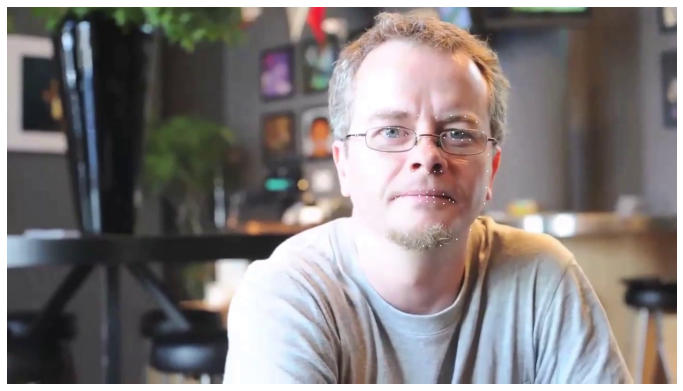

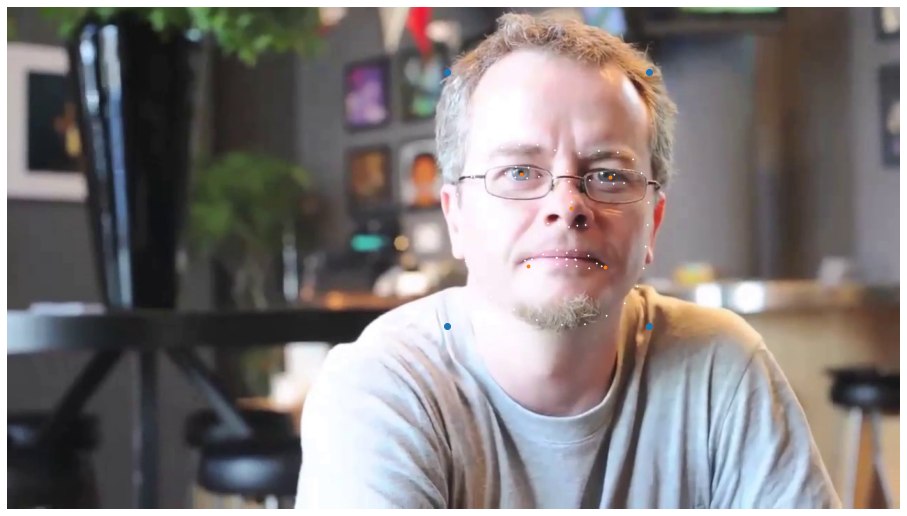

In [ ]:
#Create face detector
mtcnn = MTCNN(select_largest=False)

frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
frame = Image.fromarray(frame)

plt.figure(figsize=(12, 8))
plt.imshow(frame)
plt.axis('off')

# Detect face
face = mtcnn(frame)
face.shape

# Detect face
boxes, probs, landmarks = mtcnn.detect(frame, landmarks=True)

# Visualize
fig, ax = plt.subplots(figsize=(16, 12))
ax.imshow(frame)
ax.axis('off')

for box, landmark in zip(boxes, landmarks):
    ax.scatter(*np.meshgrid(box[[0, 2]], box[[1, 3]]))
    ax.scatter(landmark[:, 0], landmark[:, 1], s=8)
fig.show()

In [ ]:
type(frame)

PIL.Image.Image

## **Dataset sorting**

In [ ]:
def Dataset(datapath):
  #Different Test categories directory list
  Test_category_1 = ['114', '124', '125', '126', '150', '158', '401', '402', '505', '506', '507', '508', '509', '510', '511', '514', '515', '518', '519', '520', '521', '522', '524', '525', '537', '538', '540', '541', '546', '547', '548']
  Test_category_2 = ['203', '208', '211', '212', '213', '214', '218', '224', '403', '404', '405', '406', '407', '408', '409', '412', '550', '551', '553']
  Test_category_3 = ['410', '411', '516', '517', '526', '528', '529', '530', '531', '533', '557', '558', '559', '562']
  #getting all the directory video
  dir_list = os.listdir(datapath)
  dir_list.remove('ReadMe.txt')
  dir_list.remove('extra.zip')
  #getting remaning 50 videos list from all directory list for training
  Train_dir_list=[]
  for i in dir_list:
    if i not in Test_1:
      if i not in Test_2:
        if i not in Test_3:
          Train_dir_list.append(i)
  return Train_dir_list, Test_category_1, Test_category_2, Test_category_3
  

In [ ]:
def Training(folder_number): # in format Train_list[0]

    folder_path = os.path.join(DATA_DIR, folder_number)
    folder_list = os.listdir(folder_path)
    video_path = os.path.join(folder_path, folder_list[0])
    annot_path = os.path.join(folder_path, folder_list[1])

    cap = cv2.VideoCapture(video_path)
    ret, source_image = cap.read()

    frames_ld = os.listdir(annot_path)
    frames_ld = np.sort(frames_ld)
    all_landmarks = []

    for i in range(len(frames_ld)):
      current_ld_path = os.path.join(annot_path, frames_ld[i])
      current_ld_file = np.loadtxt(current_ld_path, comments=("version:", "n_points:", "{", "}")).astype(int)
      all_landmarks.append(current_ld_file)
    
    return all_landmarks, video_path, source_image

In [ ]:
Train_set, test_set1, Test_set2, Test_set3 = Dataset(DATA_DIR)

In [ ]:
Landmarks, video_path, source_image = Training(Train_set[5])

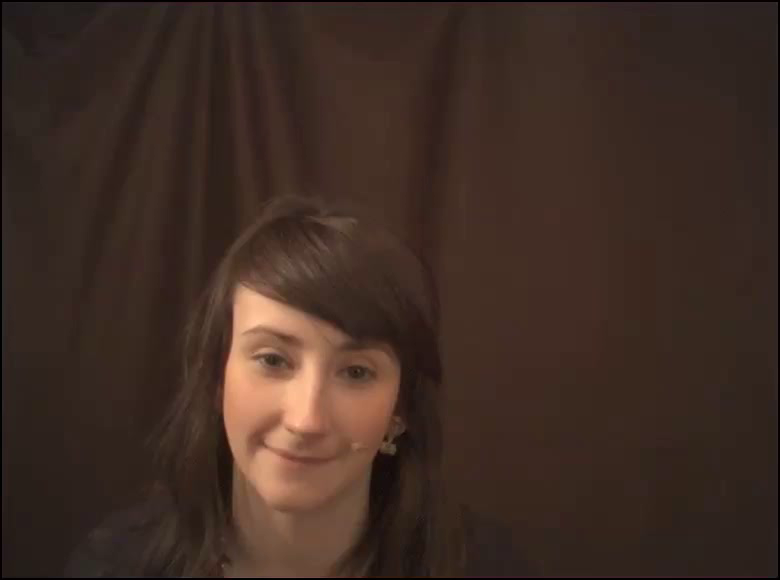

In [ ]:
cv2_imshow(source_image)

In [ ]:
def heatmap(landmarks):
  heatmaps=[[] for k in range(len(landmarks))]
  for i in range(len(landmarks)):
    temp_mask = np.zeros((128, 128, 3), dtype = "uint8")
    target_ld = landmarks[i]
    for j, (x, y) in enumerate(target_ld):
        cv2.circle(temp_mask, (x, y), 3, (255,255,255),-1)
    temp_mask=  cv2.resize(temp_mask[target_ld[0][1]-100:target_ld[9][1]+20, target_ld[0][0]-20:target_ld[16][0]+20], (128, 128)) 
    hm = cv2.applyColorMap(temp_mask, cv2.COLORMAP_HOT)
    hm = torch.from_numpy(hm)
    heatmaps[i].append(hm)
  return heatmaps

In [ ]:
x = heatmap(Landmarks)

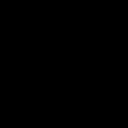

In [ ]:
cv2_imshow(x[0][0].numpy())

In [ ]:
#img = cv2.imread(x[0][0].numpy(), 1)
# path = '/content/drive/MyDrive/300VW_Dataset_2015_12_14/300VW_Dataset_2015_12_14/144/heatmaps'
# cv2.imwrite(os.path.join(path , 'trial.jpg'), x[0][0].numpy())
# cv2.waitKey(0)
type(x)

list

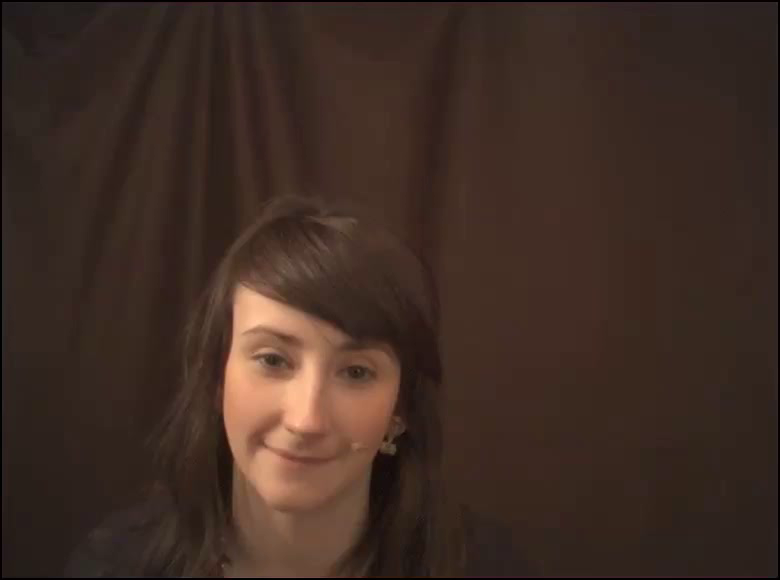

(580, 780, 3)


In [ ]:
cv2_imshow(source_image)
print(source_image.shape)

In [ ]:
def Generator_Dataset(Dataset,DataDirectory,Training,transforms,heatmap):
  Train_set, test_set1, Test_set2, Test_set3 = Dataset(DataDirectory)
  Training_image_set = [[]for i in range(len(Train_set)//4)]
  Train_heatmap_set = []
  for k in range(len(Train_set)//4):
    Landmarks, video_path, source_image = Training(Train_set[k])
    source_image = cv2.resize(source_image[Landmarks[0][0][1]-100:Landmarks[0][9][1]+20, Landmarks[0][0][0]-20:Landmarks[0][16][0]+20], (128, 128)) 
    #PIL_image = Image.fromarray(np.uint8(source_image)).convert('RGB')
    image = transforms(source_image)
    #image = image.permute(1, 2, 0)
    Training_image_set[k].append(image.permute(1,2,0))
    mask = heatmap(Landmarks) #this mask is a list of list which contains image tensors
    Train_heatmap_set.append(mask)

  return Training_image_set,Train_heatmap_set

# **Generator**

**Residual Block**

In [ ]:
class ResidualBlock(nn.Module):
  def __init__(self, input_channels):
    '''input_channels: the number of channels to expect from a given input'''
    super(ResidualBlock, self).__init__()
    self.conv1 = nn.Conv2d(input_channels, input_channels, kernel_size = 3, padding=1)
    self.conv2 = nn.Conv2d(input_channels, input_channels, kernel_size = 3, padding =1)
    self.instancenorm = nn.InstanceNorm2d(input_channels)
    self.activation = nn.ReLU()

  def forward(self, x):
    '''x: image tensor of shape (batch size, channels, height, width)'''
    original_x = x.clone()
    x = self.conv1(x)
    x = self.instancenorm(x)
    x = self.activation(x)
    x = self.conv2(x)
    x = self.instancenorm(x)
    return original_x + x

In [ ]:
class DownSample(nn.Module):
  def __init__(self, input_channels, use_bn=True, kernel_size=3, activation='relu'):
        '''input_channels: the number of channels to expect from a given input'''
        super(DownSample, self).__init__()
        self.conv1 = nn.Conv2d(input_channels, input_channels * 2, kernel_size=kernel_size, padding=1, stride=2, padding_mode='reflect')
        self.activation = nn.ReLU() if activation == 'relu' else nn.LeakyReLU(0.2)
        if use_bn:
            self.instancenorm = nn.InstanceNorm2d(input_channels * 2)
        self.use_bn = use_bn

  def forward(self, x):
        '''x: image tensor of shape (batch size, channels, height, width)'''
        x = self.conv1(x)
        if self.use_bn:
            x = self.instancenorm(x)
        x = self.activation(x)
        return x

In [ ]:
class UpSample(nn.Module):
  def __init__(self,input_channels, use_bn=True):
    super(UpSample,self).__init__()
    self.conv1 = nn.ConvTranspose2d(input_channels, input_channels // 2, kernel_size=3, stride=2, padding=1, output_padding=1)
    if use_bn:
        self.instancenorm = nn.InstanceNorm2d(input_channels // 2)
    self.use_bn = use_bn
    self.activation = nn.ReLU()

  def forward(self, x):
    x = self.conv1(x)
    if self.use_bn:
        x = self.instancenorm(x)
    x = self.activation(x)
    return x


In [ ]:
class FeatureMapBlock():
  def __init__(self, input_channels, output_channels):
        super(FeatureMapBlock, self).__init__()
        self.conv = nn.Conv2d(input_channels, output_channels, kernel_size=7, padding=3)


  def forward(self, x):
        '''x: image tensor of shape (batch size, channels, height, width)'''
        x = self.conv(x)
        return x

In [ ]:
class Generator(nn.Module):
  '''
    Generator Class
    A series of 2 downsampling blocks, 6 residual blocks, and 2 upsampling transpose blocks to 
    transform an input image into an image with the other landmarks.
    Values:
        input_channels: the number of channels to expect from a given input
        output_channels: the number of channels to expect for a given output
  '''
  def __init__(self, input_channels, output_channels, landmarks_channel, hidden_channels = 64):
        super(Generator, self).__init__()
        self.upfeature = FeatureMapBlock(hidden_channels+landmarks_channel, hidden_channels)
        self.downsample1 = DownSample(hidden_channels)
        self.downsample2 = DownSample(hidden_channels*2)
        self.res0 = ResidualBlock(hidden_channels * 4)
        self.res1 = ResidualBlock(hidden_channels * 4)
        self.res2 = ResidualBlock(hidden_channels * 4)
        self.res3 = ResidualBlock(hidden_channels * 4)
        self.res4 = ResidualBlock(hidden_channels * 4)
        self.res5 = ResidualBlock(hidden_channels * 4)
        self.res6 = ResidualBlock(hidden_channels * 4)
        self.upsample1 = UpSample(hidden_channels)
        self.upsample2 = UpSample(hidden_channels*2)
        self.downfeature = FeatureMapBlock(hidden_channels, output_channels)
        self.tanh = torch.nn.Tanh()

  def forward(self, x, sl, tl):
        x = torch.cat([x,sl,tl], dim=1)
        x0 = self.upfeature(x)
        x1 = self.downsample1(x0)
        x2 = self.downsample2(x1)
        x3 = self.res0(x2)
        x4 = self.res1(x3)
        x5 = self.res2(x4)
        x6 = self.res3(x5)
        x7 = self.res4(x6)
        x8 = self.res5(x7)
        x9 = self.sample1(x8)
        x10 = self.sample2(x9)
        xn = self.downfeature(x10)
        return xn


## **Frame Discriminator** 

In [ ]:
class FrameDiscriminator(nn.Module):
    '''
    Discriminator Class
    Structured like the contracting path of the U-Net, the discriminator will
    output a matrix of values classifying corresponding portions of the image as real or fake. 
    Parameters:
        input_channels: the number of image input channels
        hidden_channels: the initial number of discriminator convolutional filters
    '''
    def __init__(self, input_channels, hidden_channels=64):
        self.upfeature = nn.Conv2d(input_channels, hidden_channels)
        self.downsample1 = DownSample(hidden_channels)
        self.downsample2 = DownSample(hidden_channels*2)
        self.res0 = ResidualBlock(hidden_channels * 4)
        self.res1 = ResidualBlock(hidden_channels * 4)
        self.res2 = ResidualBlock(hidden_channels * 4)
        self.res3 = ResidualBlock(hidden_channels * 4)
        self.res4 = ResidualBlock(hidden_channels * 4)
        self.res5 = ResidualBlock(hidden_channels * 4)
        self.res6 = ResidualBlock(hidden_channels * 4)
        self.upsample1 = UpSample(hidden_channels)
        self.upsample2 = UpSample(hidden_channels*2)
        self.final = nn.Conv2d(hidden_channels * 8, 1, kernel_size=1)

    def forward(self, x, sl, tf, tl):
        x = torch.cat([x,sl,tf,tl], dim=1)
        x0 = self.upfeature(x)
        x1 = self.downsample1(x0)
        x2 = self.downsample2(x1)
        x3 = self.res0(x2)
        x4 = self.res1(x3)
        x5 = self.res2(x4)
        x6 = self.res3(x5)
        x7 = self.res4(x6)
        x8 = self.res5(x7)
        x9 = self.sample1(x8)
        x10 = self.sample2(x9)
        xn = self.final(x10)
        return xn

# **Video Discriminator**

In [ ]:
class ResidualBlockDisc(nn.Module):
    """Residual Block with instance normalization."""
    def __init__(self, dim_in, dim_out):
        super(ResidualBlockDisc, self).__init__()
        self.main = nn.Sequential(
            nn.Conv3d(dim_in, dim_out, kernel_size=3, stride=1, padding=1, bias=False),
            nn.InstanceNorm2d(dim_out, affine=True, track_running_stats=True),
            nn.ReLU(inplace=True),
            nn.Conv3d(dim_out, dim_out, kernel_size=3, stride=1, padding=1, bias=False),
            nn.InstanceNorm2d(dim_out, affine=True, track_running_stats=True))

    def forward(self, x):
        return x + self.main(x)

In [ ]:
class VideoDiscriminator(nn.Module):
    """Discriminator network with PatchGAN."""
    def __init__(self, input_channels=3, hidden_channels=64):
        super(VideoDiscriminator, self).__init__()
        layers = []
        layers.append(nn.Conv3d(input_channels, hidden_channels, kernel_size=4, stride=2, padding=1))
        layers.append(nn.InstanceNorm2d(hidden_channels, affine=True, track_running_stats=True))
        layers.append(nn.LeakyReLU(0.01))

        # Down-sampling layers
        curr_dim = hidden_channels
        for i in range(2):
            layers.append(nn.Conv3d(curr_dim, curr_dim*2, kernel_size=4, stride=2, padding=1, bias=False))
            layers.append(nn.InstanceNorm2d(curr_dim*2, affine=True, track_running_stats=True))
            layers.append(nn.ReLU(inplace=True))
            curr_dim = curr_dim * 2

        curr_dim = hidden_channels
        for i in range(1, 6):
            layers.append(ResidualBlockDisc(dim_in=curr_dim, dim_out=curr_dim))

        # Up-sampling layers
        for i in range(2):
            layers.append(nn.ConvTranspose3d(curr_dim, curr_dim//2, kernel_size=4, stride=2, padding=1, bias=False))
            layers.append(nn.InstanceNorm2d(curr_dim//2, affine=True, track_running_stats=True))
            layers.append(nn.ReLU(inplace=True))

        layers.append(nn.Conv2d(curr_dim, input_channels, kernel_size=7, stride=1, padding=3, bias=False))
        self.main = nn.Sequential(*layers)
        self.conv1 = nn.Conv3d(curr_dim, 1, kernel_size=3, stride=1, padding=1, bias=False)
        
    def forward(self, x):
        '''x is a stack of generated video frames'''
        h = self.main(x)
        out_src = self.conv1(h)
        return out_src

## **Training Preparation**

  *   adv_criterion: an adversarial loss function to keep track of how well the GAN is fooling the discriminator and how well the discriminator is catching the GAN
  *   recon_criterion: a loss function that rewards similar images to the ground truth, which "reconstruct" the image
  *   n_epochs: the number of times you iterate through the entire dataset when training
  *   img_dim: the number of channels of the images in pile A
  *   display_step: how often to display/visualize the images
  *   batch_size: the number of images per forward/backward pass
  *   lr: the learning rate
  *   target_shape: the size of the input and output images (in pixels)
  *   load_shape: the size for the dataset to load the images at before randomly cropping them to target_shape as a simple data augmentation
  *   device: the device type

In [ ]:
import torch.nn.functional as F
from tqdm.auto import tqdm
from torchvision import transforms
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
torch.manual_seed(0)

adv_criterion = nn.MSELoss() 
ImageReconstructionLoss = nn.L1Loss()
cap = cv2.VideoCapture(video_path)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

n_epochs = 10
img_dim = 3
display_step = 200
batch_size = 1
lr = 0.0002
load_shape = 256
target_shape = 128
device = 'cuda' 

In [ ]:
PIL_image = Image.fromarray(np.uint8(source_image)).convert('RGB')

In [ ]:
transform = transforms.Compose([
    #transforms.Resize(target_shape),
    #transforms.RandomCrop(target_shape),
    transforms.ToTensor(),
])

# import torchvision
# dataset = transform(PIL_image)

In [ ]:
#dataset

In [ ]:
#plt.imshow(dataset.permute(1, 2, 0))

In [ ]:
gen = Generator(img_dim,img_dim,total_frames).to(device)
gen_opt = torch.optim.Adam(list(gen.parameters()), lr=lr, betas=(0.5, 0.999))


In [ ]:
Training_Image_Set, Training_Landmark_Set = Generator_Dataset(Dataset, DATA_DIR, Training, transform, heatmap)

error: ignored

In [ ]:
'''Here XXX contains list of three source image tensors which will be passed to the generator
Here xxx[0] will give a list of three source images and diving deep into indexing i.e., xxx[0][0] will give Tensor of first image'''
#plt.imshow(xxx[0][0])

In [ ]:
''' Here yyy is the list of three lists which contains heatmap images for source as well as target landmarks
each list is itself a lists of list.

len(yyy[0]) will give 1796 which are target landmarks
yyy[0][0][0] is the first source landmark of the first source image
similarly yyy[0][1][0] is the first target landmarks of the first source image
yyy[0][2][0] is the second target landmark of the first source image
and yyy[0][1795][0] is the last target landmark'''

''' same goes for second and third source images. yyy[1] and yyy[2]'''
''' yyy[index][index][index].shape will give the required image tensor'''
len(Training_Landmark_Set[0])

1796

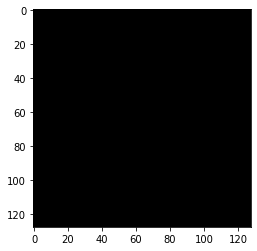

In [ ]:
plt.imshow(Training_Landmark_Set[2][566][0])